## Exercício 1

[1.9917, 5.9713, 14.0452, 30.0822, 62.4043, 126.915, 256.4386, 505.2742, 1031.0758, 2051.4152]


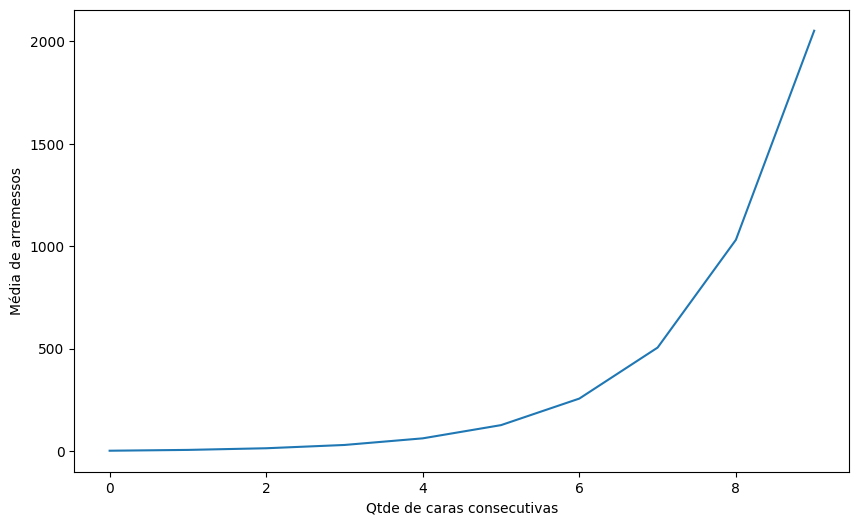

In [1]:
import numpy
import matplotlib.pyplot as matPlot

def n_heads(n):
    counter = 0
    numberOfSamples = 0

    while counter != n:
        currentSample = numpy.random.choice(['Head', 'Tail'])
        numberOfSamples += 1

        if currentSample == 'Head':
            counter += 1
            if counter == n:
                return numberOfSamples
        elif currentSample == 'Tail' and counter > 0:
            counter = 0

results = []
resultsByN = []

n = 10
monteCarlo = 10000

for j in range(1, n + 1):
    for i in range(monteCarlo):
        results.append(n_heads(j))
    resultsByN.append(numpy.mean(results))
    results = []

print(resultsByN)

matPlot.figure(figsize=(10, 6))
matPlot.plot(resultsByN)
matPlot.xlabel("Qtde de caras consecutivas")
matPlot.ylabel("Média de arremessos")
matPlot.show()




---

## Exercício 2

Média dos resultados com vantagem: 13.99873
Média dos resultados sem vantagem: 10.49709
----------------------------------------------------------------------------------------------------


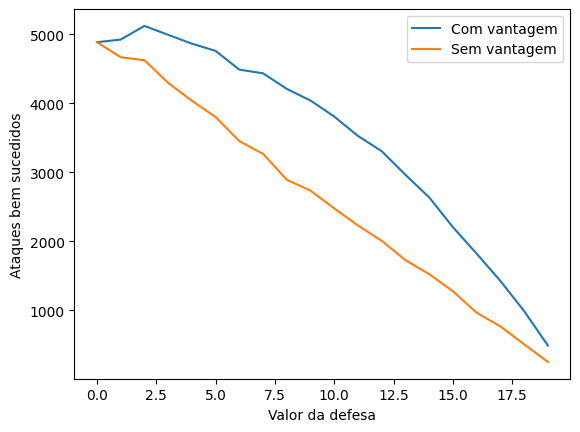

In [40]:
import numpy
import matplotlib.pyplot as matPlot

# Retorna o melhor resultado encontrado
def with_advantage():

    diceOne = numpy.random.randint(1, 21)
    diceTwo = numpy.random.randint(1, 21)

    while diceOne == diceTwo:
        diceOne = numpy.random.randint(1, 21)
        diceTwo = numpy.random.randint(1, 21)

    if diceOne > diceTwo:
        return diceOne
    else:
        return diceTwo
    

# Retorna o unico resultado
def without_advantage():

    dice = numpy.random.randint(1, 21)
    
    return dice
            
# Retorna a defesa do monstro
def deffense():
    return numpy.random.randint(1, 21)
# ---------------------------------------------------------------

# Alternativa A
resultsWithAdvantage = []
resultsWithoutAdvantage = []
resultsDeffense = []
monteCarlo = 100000

for i in range(monteCarlo):
    resultsWithAdvantage.append(with_advantage())
    resultsWithoutAdvantage.append(without_advantage())
    resultsDeffense.append(deffense())

print(f'Média dos resultados com vantagem: {numpy.mean(resultsWithAdvantage)}')
print(f'Média dos resultados sem vantagem: {numpy.mean(resultsWithoutAdvantage)}')
print('-'*100)

# Resposta: com vantagem sera sempre a melhor opcao
# ---------------------------------------------------------------

# Alternativa B
successWithAdvantage = []
successWithoutAdvantage = []
for i in range(20):
    successWithAdvantage.append(0)
    successWithoutAdvantage.append(0)


for i in range(monteCarlo):
    if resultsWithAdvantage[i] >= resultsDeffense[i]:
        successWithAdvantage[resultsDeffense[i] - 1] += 1
    if resultsWithoutAdvantage[i] >= resultsDeffense[i]:
        successWithoutAdvantage[resultsDeffense[i] - 1] += 1

matPlot.plot(successWithAdvantage, label='Com vantagem')
matPlot.plot(successWithoutAdvantage, label='Sem vantagem')
matPlot.xlabel("Valor da defesa")
matPlot.ylabel("Ataques bem sucedidos")
matPlot.legend()
matPlot.show()
# ---------------------------------------------------------------

# Alternativa C:
# Com certeza a habilidade "Vantagem" influencia, pois ela tem uma taxa de sucesso muito maior
#do que a sem vantagem, isso pode ser observado no grafico.


---

## Exercício 3

In [3]:
import numpy

def n_heads(n):

    numbersOfLaunch = 0

    while n != 0:
        currentSample = numpy.random.choice(['Head', 'Tail'])
        numbersOfLaunch += 1
        if currentSample == 'Head':
            n -= 1
    return numbersOfLaunch


numbersOfLaunch = []
monteCarlo = 10000
n = 40

for i in range(monteCarlo):
    numbersOfLaunch.append(n_heads(n))

print(f"O número médio de lançamentos será de {numpy.mean(numbersOfLaunch)} vezes.")

O número médio de lançamentos será de 79.9817 vezes.



---

## Exercício 4


In [24]:
import numpy

def bothBoys():
    firstKid = numpy.random.choice(['B', 'G'])
    secondKid = numpy.random.choice(['B', 'G'])

    if firstKid == 'B' and secondKid == 'B':
        return True
    else:
        return False
    
monteCarlo = 100000
results = []

for i in range(monteCarlo):
    result = bothBoys()
    if result:
        results.append(1)
    else:
        results.append(0)

print(f'A probabilidade é de {numpy.mean(results)}')


A probabilidade é de 0.25058



---

## Exercício 5


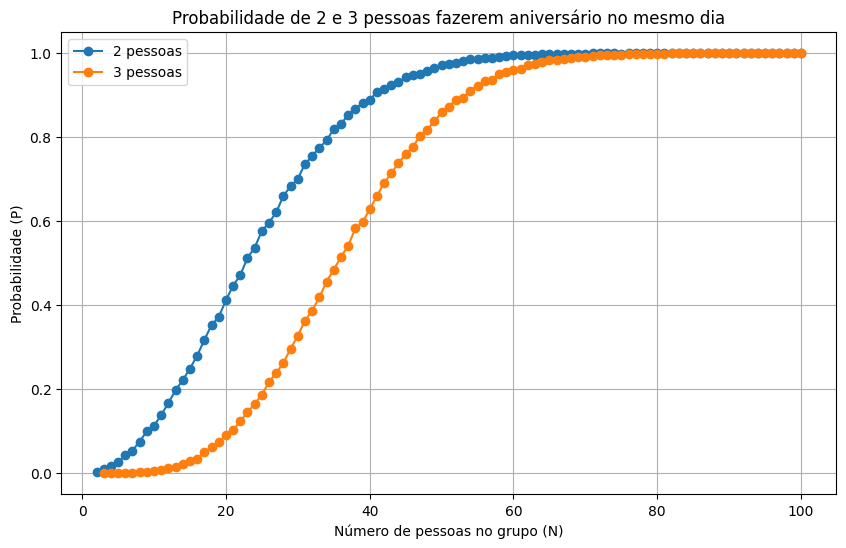

In [6]:
import numpy
import matplotlib.pyplot as matPlot

def probability2persons(N, monteCarlo=10000):
    success = 0  # Contador de vezes em que 2 pessoas fazem aniversário no mesmo dia

    for _ in range(monteCarlo):
        # Simular aniversários aleatórios de N pessoas
        birthdays = numpy.random.randint(1, 366, N)
        
        # Verificar se há aniversários iguais
        if len(birthdays) != len(set(birthdays)):
            success += 1

    # Calcular a probabilidade como o número de sucessos dividido pelo número de simulações
    probability = success / monteCarlo

    return probability

def probability3persons(N, monteCarlo=10000):
    success = 0  # Contador de vezes em que 3 pessoas compartilham um aniversário

    for _ in range(monteCarlo):
        # Simular aniversários aleatórios de N pessoas
        birthdays = numpy.random.randint(1, 366, N)
        
        # Verificar se há três aniversários iguais
        if len(birthdays) - len(set(birthdays)) >= 2:
            success += 1

    # Calcular a probabilidade como o número de sucessos dividido pelo número de simulações
    probability = success / monteCarlo

    return probability


N_range = numpy.arange(2, 101)  # Tamanhos de grupos de 2 a 100
N_range3 = numpy.arange(3, 101) # Tamanhos de grupos de 3 a 100
odds_2_persons = []
odds_3_persons = []

for N in N_range:
    odds = probability2persons(N)
    odds_2_persons.append(odds)


for N in N_range3:
    odds = probability3persons(N)
    odds_3_persons.append(odds)


matPlot.figure(figsize=(10, 6))
matPlot.plot(N_range, odds_2_persons, marker='o', linestyle='-', label='2 pessoas')
matPlot.plot(N_range3, odds_3_persons, marker='o', linestyle='-', label='3 pessoas')
matPlot.title('Probabilidade de 2 e 3 pessoas fazerem aniversário no mesmo dia')
matPlot.xlabel('Número de pessoas no grupo (N)')
matPlot.ylabel('Probabilidade (P)')
matPlot.grid(True)
matPlot.legend()
matPlot.show()



---

## Exercício 6


In [4]:
import math
import numpy

# a)
drunkGuy = [0, 0]
while True:
    angle = numpy.random.uniform(0, 2 * math.pi)

    drunkGuy[0] = drunkGuy[0] + math.cos(angle)
    drunkGuy[1] = drunkGuy[1] + math.sin(angle)

    if math.dist([0,0], drunkGuy) > 5:
      print("Posição em relação ao poste: {}".format(drunkGuy))
      break

# b)
distance = []
arrayOfSteps = []

steps = 500
for i in range(10000):
  for i in range(steps):
      angle = numpy.random.uniform(0, 2 * math.pi)

      drunkGuy[0] = drunkGuy[0] + math.cos(angle)
      drunkGuy[1] = drunkGuy[1] + math.sin(angle)

      distance.append(math.dist([0,0], drunkGuy))
      arrayOfSteps.append(steps)

Posição em relação ao poste: [-1.2439672195671476, -5.283351701403897]
